In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import BasicAer as Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
import numpy as np

In [2]:
backend = Aer.get_backend('statevector_simulator')

q = QuantumRegister(2)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

circuit.x(q[0])
circuit.h(q[0])
circuit.cx(q[0], q[1])

#circuit.measure(q[0], c[0])

print(circuit)

#circuit.iden(q[0])
job = execute(circuit, backend)
state = job.result().get_statevector(circuit)
print(state)


         ┌───┐┌───┐     
q0_0: |0>┤ X ├┤ H ├──■──
         └───┘└───┘┌─┴─┐
q0_1: |0>──────────┤ X ├
                   └───┘
 c0_0: 0 ═══════════════
                        
[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


         ┌───┐┌───┐     ┌─┐   
q1_0: |0>┤ X ├┤ H ├──■──┤M├───
         └───┘└───┘┌─┴─┐└╥┘┌─┐
q1_1: |0>──────────┤ X ├─╫─┤M├
                   └───┘ ║ └╥┘
 c1_0: 0 ════════════════╩══╬═
                            ║ 
 c1_1: 0 ═══════════════════╩═
                              


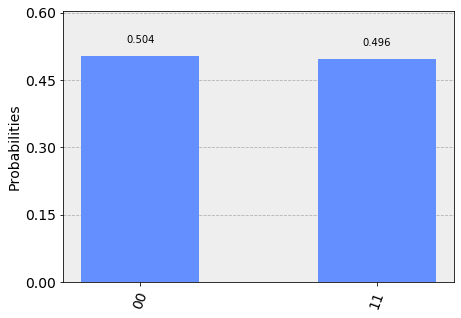

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)

circuit.x(q[0])
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q,c)

#circuit.measure(q[0], c[0])

print(circuit)

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(circuit))

         ┌───┐┌─┐┌─┐
q2_0: |0>┤ H ├┤M├┤M├
         └───┘└╥┘└╥┘
 c2_0: 0 ══════╩══╬═
                  ║ 
 c2_1: 0 ═════════╩═
                    


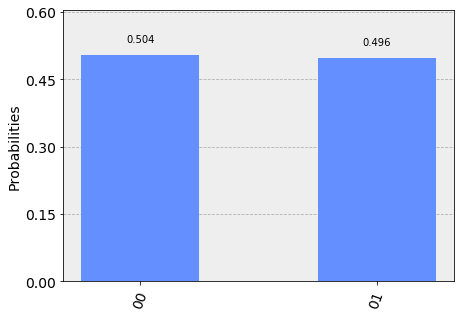

In [4]:
q = QuantumRegister(1)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)

circuit.h(q[0])
circuit.measure(q[0],c[0])
circuit.measure(q[0],c[1])
print(circuit)

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(circuit))

#Care with bug. Measure have to be 00 or 11

         ┌───┐┌─┐   
q3_0: |0>┤ H ├┤M├───
         ├───┤└╥┘┌─┐
q3_1: |0>┤ H ├─╫─┤M├
         └───┘ ║ └╥┘
 c3_0: 0 ══════╩══╬═
                  ║ 
 c3_1: 0 ═════════╩═
                    


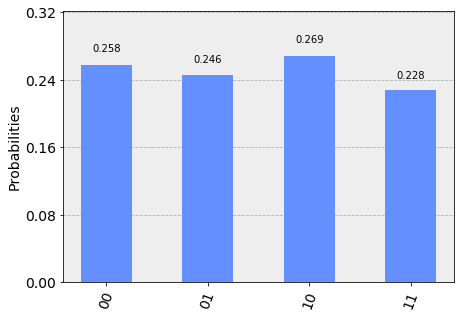

In [5]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)

circuit.h(q[0])
circuit.h(q[1])
circuit.measure(q, c)

print(circuit)

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(circuit))

In [6]:
ket = np.array([[1], [0], [0], [1]])/np.sqrt(2)
bra = ket.T.conj()
dm = ket @ bra
dm

array([[0.5, 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0.5]])